In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_56423_Z')

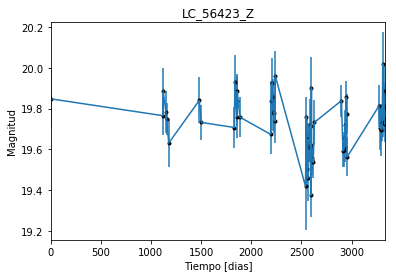

In [2]:
data = np.genfromtxt('LC_56423_Z.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_56423_Z')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

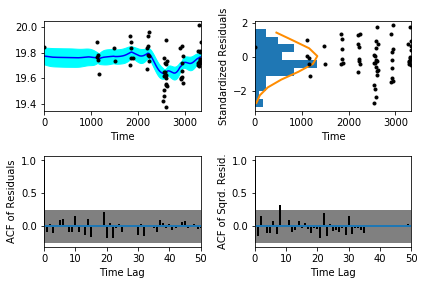

In [5]:
sample.assess_fit()

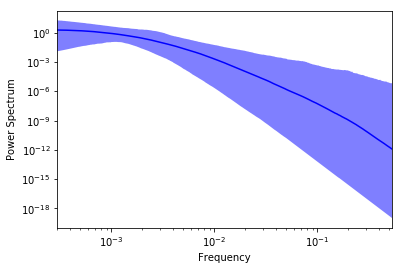

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_56423_Z')

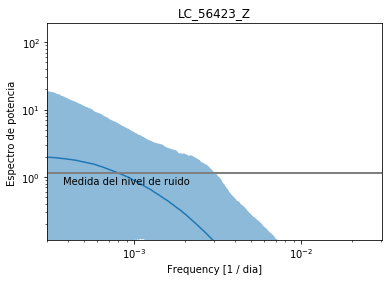

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_56423_Z')

Text(0.5,1,'Prediccion , valor esperado LC_56423_Z')

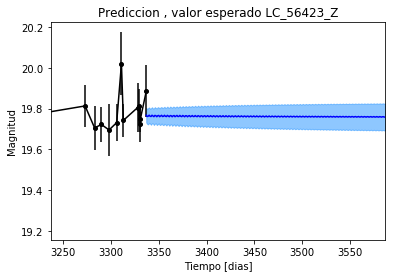

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_56423_Z')

Text(0.5,1,'Prediccion, Caminos simulados  LC_56423_Z')

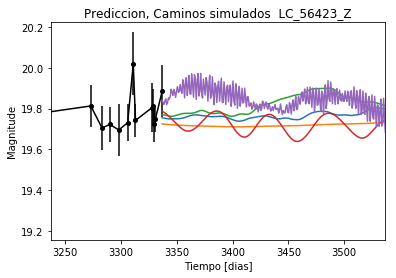

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados  LC_56423_Z')

Text(0.5,1,'LC_56423_Z')

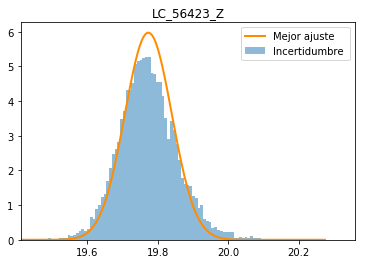

In [12]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_56423_Z')

Text(0.5,1,'Interpolacion, camino simulado LC_56423_Z')

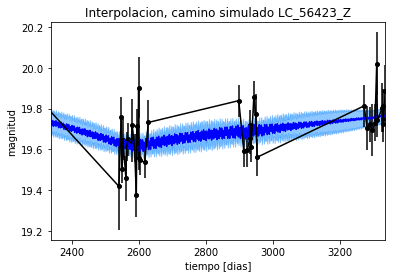

In [13]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_56423_Z')

Text(0.5,1,'Interpolacion, camino simulado LC_56423_Z')

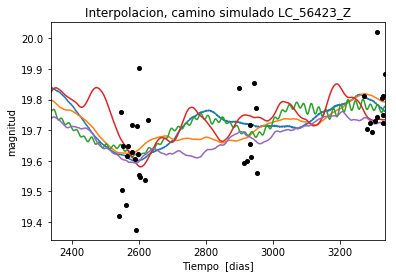

In [14]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_56423_Z')

In [15]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [16]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 1011.14186369
Median: 0.00829514739161
Standard deviation: 0.185096125565
68% credibility interval: [ 0.0008337  0.1595812]
95% credibility interval: [  3.46398009e-04   7.29317730e-01]
99% credibility interval: [  3.08492840e-04   1.00218687e+00]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 585.958686297
Median: 0.00230651617166
Standard deviation: 0.092752075082
68% credibility interval: [ 0.00052047  0.02777529]
95% credibility interval: [ 0.00032424  0.27159402]
99% credibility interval: [  3.03780830e-04   7.25689574e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 612.269208012
Median: 0.00987033732762
Standard d

In [17]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 2587.94389342
Median: 79.3631218296
Standard deviation: 1.54008553148
68% credibility interval: [ 77.60252927  80.38850416]
95% credibility interval: [ 75.12198825  80.9330241 ]
99% credibility interval: [ 73.21982469  81.29760502]


In [18]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 627.999849112
Median: 0.483994662785
Standard deviation: 2.14015812981
68% credibility interval: [ 0.04649057  3.45091856]
95% credibility interval: [ 0.01395544  7.21227957]
99% credibility interval: [  9.58691686e-03   1.06776498e+01]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 1011.47061537
Median: 0.299092941902
Standard deviation: 9.59407914548
68% credibility interval: [ 0.00904623  7.50343889]
95% credibility interval: [  6.0

In [19]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 19021.9673487
Median: 1.93762782124e-16
Standard deviation: 4.43667123032e+69
68% credibility interval: [  7.01980037e-56   2.86744266e+02]
95% credibility interval: [  2.59318870e-101   9.43791989e+062]
99% credibility interval: [  2.40869993e-118   2.51130666e+068]


In [20]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2756.76541861
Median: 19.7440120504
Standard deviation: 0.047068756573
68% credibility interval: [ 19.70828356  19.78418189]
95% credibility interval: [ 19.66622144  19.84864655]
99% credibility interval: [ 19.6199765   19.93081544]


In [21]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 391.489126535
Median: 0.012092661621
Standard deviation: 0.246168209549
68% credibility interval: [ 0.          0.32296784]
95% credibility interval: [ 0.          0.90206186]
99% credibility interval: [ 0.          1.03240862]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 391.489126535
Median: 0.012092661621
Standard deviation: 0.246168209549
68% credibility interval: [ 0.          0.32296784]
95% credibility interval: [ 0.          0.90206186]
99% credibility interval: [ 0.          1.03240862]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 14337.5511926
Median: 0.0
Standard deviation: 0.00365581979084
68% credi

In [22]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 2587.94389342
Median: 79.3631218296
Standard deviation: 1.54008553148
68% credibility interval: [ 77.60252927  80.38850416]
95% credibility interval: [ 75.12198825  80.9330241 ]
99% credibility interval: [ 73.21982469  81.29760502]


In [23]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 3157.62774358
Median: 0.00650229061947
Standard deviation: 0.0115004868258
68% credibility interval: [ 0.00339253  0.01356342]
95% credibility interval: [ 0.00187437  0.03370843]
99% credibility interval: [ 0.00123264  0.06888678]


In [24]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 2443.5673258
Median: 1.01756972332
Standard deviation: 0.146767927215
68% credibility interval: [ 0.88861609  1.17266428]
95% credibility interval: [ 0.79101555  1.36023717]
99% credibility interval: [ 0.72578468  1.51539022]


In [25]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 1130.57584602
Median: 2.9443051e-05
Standard deviation: 0.108334878019
68% credibility interval: [  1.25038151e-08   2.34194150e-03]
95% credibility interval: [  1.78118774e-67   1.47422533e-01]
99% credibility interval: [  3.39478940e-73   6.61711888e-01]


In [26]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 1011.14186369
Median: (-0.0521199482118-0.070261662486j)
Standard deviation: 1.93517377768
68% credibility interval: [-1.00267828-3.83624989j -0.00523828-0.48854787j]
95% credibility interval: [ -4.58243845e+00-6.66325526j  -2.17648288e-03-0.04837362j]
99% credibility interval: [ -6.29692582e+00+0.j          -1.93831768e-03-0.00403786j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 585.958686297
Median: (-0.0144922685205+1.09279633415j)
Standard deviation: 1.65286871419
68% credibility interval: [-0.17451728+0.22742223j -0.00327022+0.j        ]
95% credibility interval: [-1.70647556 +6.40673420e+00j -0.00203725 +4.98634152e-03j]
99% credibility interval: [ -4.55964207e+00+6.49099333j  -1.90871125e-03+0.j        ]
Pos